# Observing the profit & revenue trends of Fortune 500 companies from 1955 to 2005

### Setting up the dataset and libraries

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("fortune500.csv")

Take a peek at the kind of data coming in

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
#Set the columns
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

#Check the number of rows in the dataframe
len(df)

25500

25500 makes sense, 500 companies for 51 years, 1955 to 2005 inclusive

Next, we check the types of the various columns

In [6]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Instead of a float datatype, it appears profit contains  non-numeric characters.

We can investigate to be sure.

In [7]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Our investigation shows that some profit values as not available (N.A)

Let's check if any other values besides "N.A." have crept into the profit column

In [8]:
set(df.profit[non_numeric_profits])

{'N.A.'}

It is clear that no other values besides "N.A." are in the column.

But how many values are missing?

In [9]:
len(df.profit[non_numeric_profits])

369

What fraction of our dataset is this?

In [10]:
len(df.profit[non_numeric_profits])/len(df)*100

1.4470588235294117

Barely **1.5%**, a small fraction, but not completely inconsequential.

If this missing data is roughly evenly distributed, we can just remove it, as it won't affect any one year too adversely.

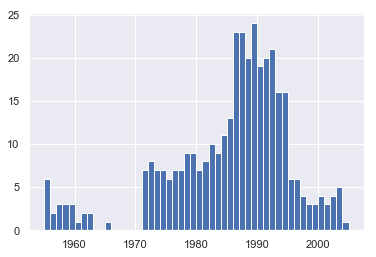

In [11]:
returned_data = plt.hist(df.year[non_numeric_profits], bins=range(1955,2006))
# returned data is a list returned from plt.hist()
# we do not require this data,
# however, failing to save it to a variable causes it to be printed to the screen

```
At a glance, we can see that the most invalid values in a single year is fewer than 25, and as there are 500 data points per year, removing these values would account for less than 4% of the data for the worst years. Indeed, other than a surge around the 90s, most years have fewer than half the missing values of the peak. For our purposes, let's say this is acceptable and go ahead and remove these rows.
```

In [12]:
df = df.loc[~non_numeric_profits] #set df to exclude non_numeric_profits
print(len(df)) #check new length of df
df.profit = df.profit.apply(pd.to_numeric) #force datatype of profit to a numeric
df.dtypes #check to make sure that datatype of profit column is now numeric

25131


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

 
### Plotting with matplotlib

In [13]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0, y=0)

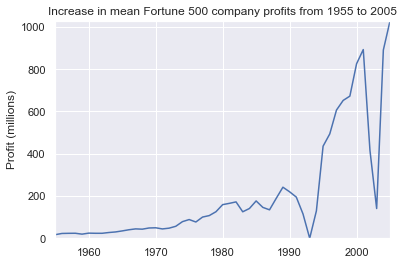

In [14]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

Looks like an exponential, but with some huge dips

They must correspond to the early 1990s recession and the dot-com bubble. It's pretty interesting to see that in the data. But how come profits recovered to even higher levels post each recession?

**Maybe the revenues can tell us more.**

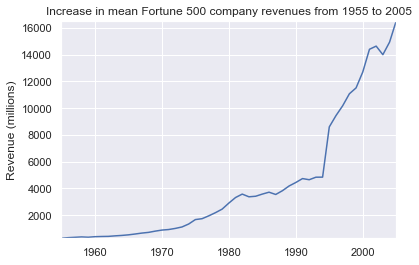

In [15]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

Revenues continued to increase even when profits dropped.

Let's superimpose these plots with +/- their standard deviations

In [16]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

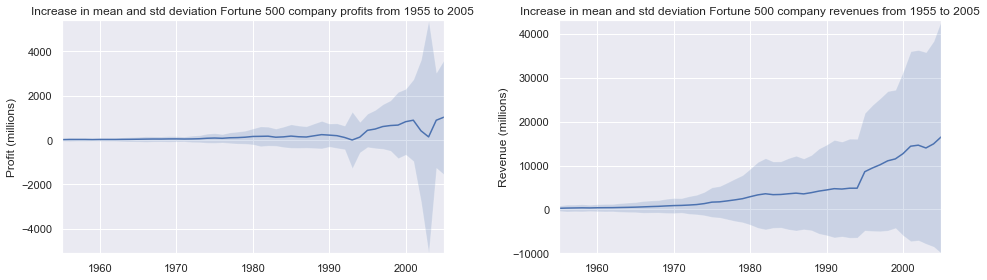

In [17]:
#Original tutorial used DataFrame.as_matrix()
#This has been replaced with .values, since .as_matrix is deprecated
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std deviation Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14,4)
fig.tight_layout()

###### We can see that a lthe standard deviations are huge. Some fortune 500 companies make billions while others lose billions, and the risk has increased with rising profits over the years.